In [9]:
import numpy as np 
# import libraries for plotting isosurfaces
import plotly
import plotly.graph_objs as go
# utility for clearing output of cell as loop runs in notebook
from IPython.display import clear_output
import matplotlib.pyplot as plt
data_path = '/home/sathvikc/AMATH-482/Homework Assignments/Homework 1/subdata.npy'
d = np.load(data_path)

In [10]:
# plot the data in time 

L = 10; # length of spatial domain (cube of side L = 2*10)
N_grid = 64; # number of grid points/Fourier modes in each direction
xx = np.linspace(-L, L, N_grid+1) #spatial grid in x dir
x = xx[0:N_grid]
y = x # same grid in y,z direction
z = x

K_grid = (2*np.pi/(2*L))*np.linspace(-N_grid/2, N_grid/2 -1, N_grid) # frequency grid for one coordinate

fft_sum = None
for j in range(np.size(d, 1)):
    signal = np.reshape(d[:, j], (N_grid, N_grid, N_grid))
    fft = np.fft.fftshift(np.fft.fftn(signal))
    fft_sum = fft if fft_sum is None else fft_sum + fft
fft_sum /= np.size(d, 1)

center_freq = np.unravel_index(np.argmax(np.abs(fft_sum)), fft_sum.shape)
print(center_freq)

(39, 49, 10)


In [28]:
fft = np.fft.fftshift(np.fft.fftn(signal))
k1, k2, k3= np.meshgrid(K_grid, K_grid, K_grid)
def g(x, y, z, s):
    return np.exp(-((x - center_freq[0])**2 + (y - center_freq[1])**2 + (z - center_freq[2])**2)/(2 * s**2))
x_cords = []
y_cords = []
z_cords = []
sigma = 25
for j in range(np.size(d, 1)):
    signal = np.reshape(d[:, j], (N_grid, N_grid, N_grid))
    fft = np.fft.fftshift(np.fft.fftn(signal))
    fft_filter = g(k1, k2, k3, sigma) * fft

    denoised_signal = np.real(np.fft.ifftn(np.fft.ifftshift(fft_filter)))
    normalized_denoised_signal = denoised_signal/np.abs(denoised_signal).max()
    max_location = np.unravel_index(np.argmax(normalized_denoised_signal), normalized_denoised_signal.shape)
    x_cords.append(max_location[0])
    y_cords.append(max_location[1])
    z_cords.append(max_location[2])


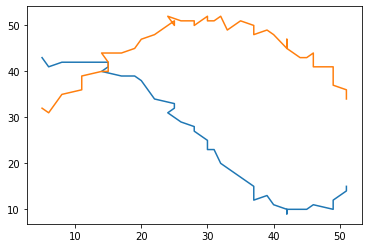

In [38]:
fft = np.fft.fftshift(np.fft.fftn(signal))
k1, k2, k3= np.meshgrid(K_grid, K_grid, K_grid)
def g(x, y, z, s):
    return np.exp(-((x - center_freq[0] + 32)**2 + (y - center_freq[1] + 32)**2 + (z - center_freq[2] + 32)**2)/(2 * s**2))
x_cords = []
y_cords = []
z_cords = []
sigma = 15
for j in range(np.size(d, 1)):
    signal = np.reshape(d[:, j], (N_grid, N_grid, N_grid))
    fft = np.fft.fftshift(np.fft.fftn(signal))
    fft_filter = g(k1, k2, k3, sigma) * fft

    denoised_signal = np.real(np.fft.ifftn(np.fft.ifftshift(fft_filter)))
    normalized_denoised_signal = denoised_signal/np.abs(denoised_signal).max()
    max_location = np.unravel_index(np.argmax(normalized_denoised_signal), normalized_denoised_signal.shape)
    x_cords.append(max_location[0])
    y_cords.append(max_location[1])
    z_cords.append(max_location[2])
fig, ax = plt.subplots()
ax.plot(x_cords, y_cords)
ax.plot(x_cords, z_cords)
plt.show()

Central Frequency strength seems to be around 90 (maximum of the frequency after taking the average over time)

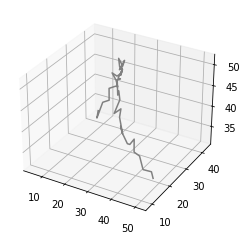

In [39]:
ax = plt.axes(projection='3d')
ax.plot3D(x_cords, y_cords, z_cords, 'gray')